#**SPRINT 03 - Configuração do Apache NIFI parte 01**
##**Objetivo da Sprint 03 :**

Após finalizar a **Sprint 01** com as entregas do Dockerfile e do Namenode configurado e operando, na **Sprint 02** implementei o Dockerfile e as configurações do **datanode1** e **datanode2**, resultando em um cluster hadoop HDFS de três máquinas pronto para operação.

Na **Sprint 03**, trabalhei com o **Apache Nifi**, utilizando o Docker para construir a infraestrutura. Já tínha uma rede de Docker para o nosso cluster montada nas **sprints 01 e 02**, e aproveitei para incluir mais uma máquina como container com o Apache Nifi, o que simplificou a preparação da infraestrutura.

Nessa sprint, configurei os primeiros **processors** do Apache Nifi, permitindo o envio de dados de uma pasta local para o uma pasta configurada dentro do cluster **Hadoop HDFS**.

**Entregas esperadas da Sprint de trabalho**

01- Apache NiFi configurado e em funcionamento.\
02- Realizar o fluxo de dados de um ambiente local para o Hadoop HDFS utilizando o Apache Nifi.

**Fases do trabalho:**
* Fazer o download e inicializar a imagem do Apache NiFi via Docker.
* Inicialização do container Docker para o Apache NiFi.
* Acessar o localhost do Apache NiFi.
* Configurar o processor **GetFile** no Apache NiFi.
* Configurar o processor **PutHDFS** no Apache NiFi.
* Executar os processors do Apache NiFi para mover dados de uma pasta local para uma pasta criada no Cluster Hadoop HDFS.


---

###**1- Baixar e Inicializar a Imagem docker do Apache Nifi**

**A-** Acessei o link https://hub.docker.com/r/apache/nifi\

**B-** Copiei o comando: ***docker pull apache/nifi***\
**C-Executei o comando via terminal/Linux.**

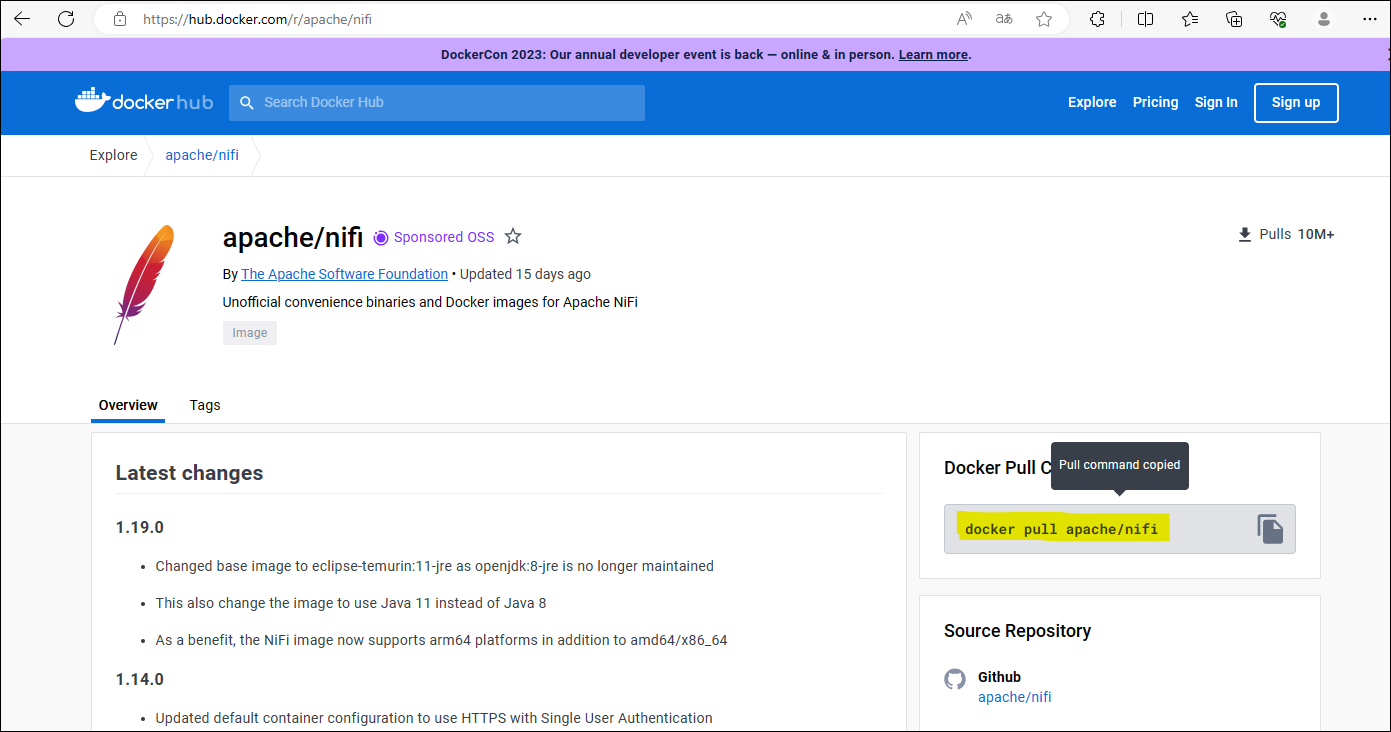





---


###**1.1- Inicialização do container docker para o Apache Nifi.**

Para iniciar o container Docker do Apache Nifi, segui o modelo recomendado na documentação do Docker voltada para o Apache Nifi, que pode ser encontrada neste link: https://hub.docker.com/r/apache/nifi. No tópico **"Running. container,"**

Fiz algumas alterações, no modelo do container, como adicionando-o à rede que foi criada para o cluster hadoop HDFS e alterando a senha.\
**Executei o comando docker no terminal/linux.**


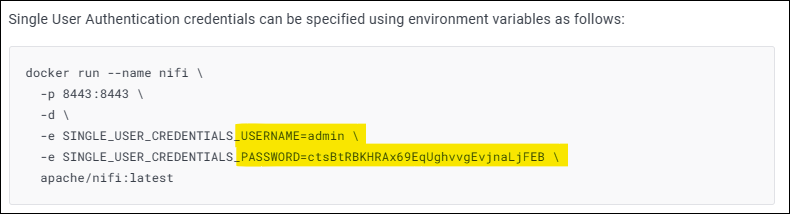

---

###**1.2- Acessar o Localhost do Apache Nifi**

Após baixar a imagem do Apache Nifi via docker e iniciar o container. Acessei o
https://localhost:8443/nifi

**A** - Coloquei senha e usuario que foram configuradas no modelo do container na documentação do docker.

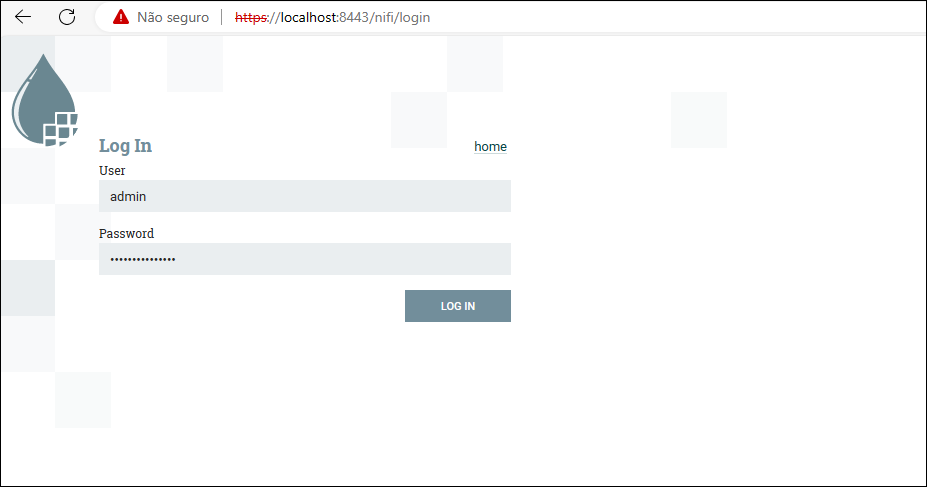


**B** - Ao acessar, me deparei com uma mensagem informando que minha conexão não era privada. Isso ocorreu porque o certificado que veio com o Apache Nifi estava expirado. No entanto, não é um problema grave, então cliquei na opção "Avançado" para prosseguir".

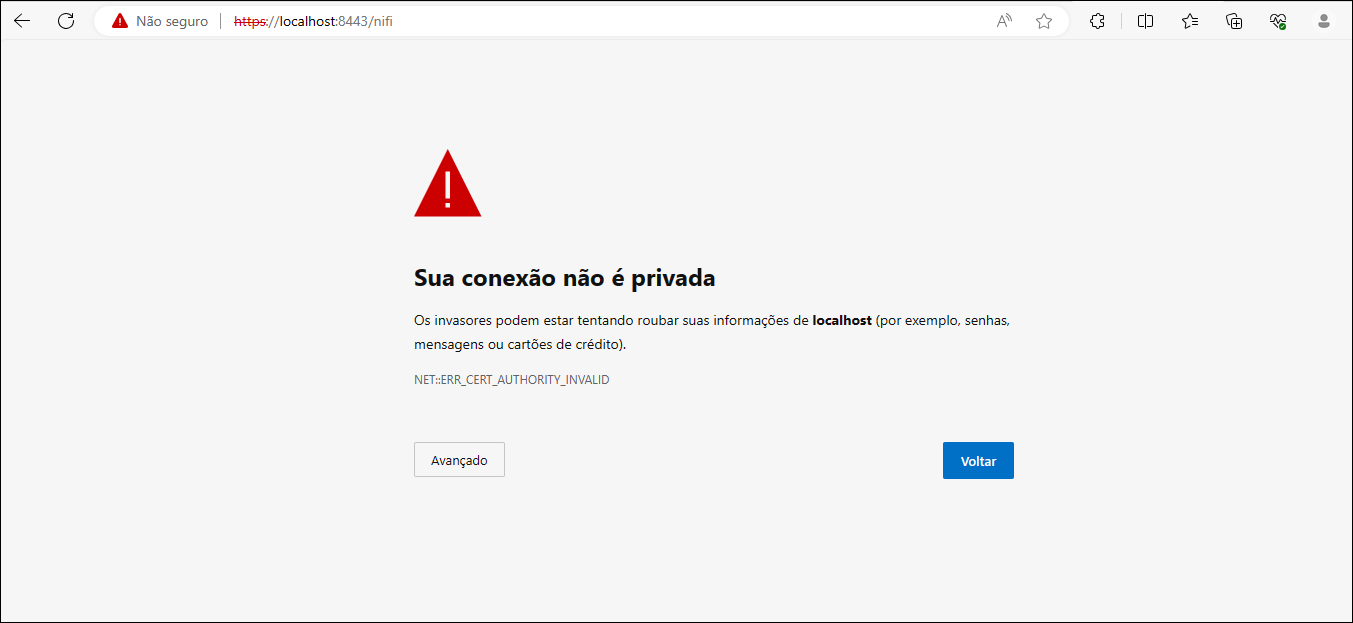


**C**- Cliquei em **continue até o localhost**

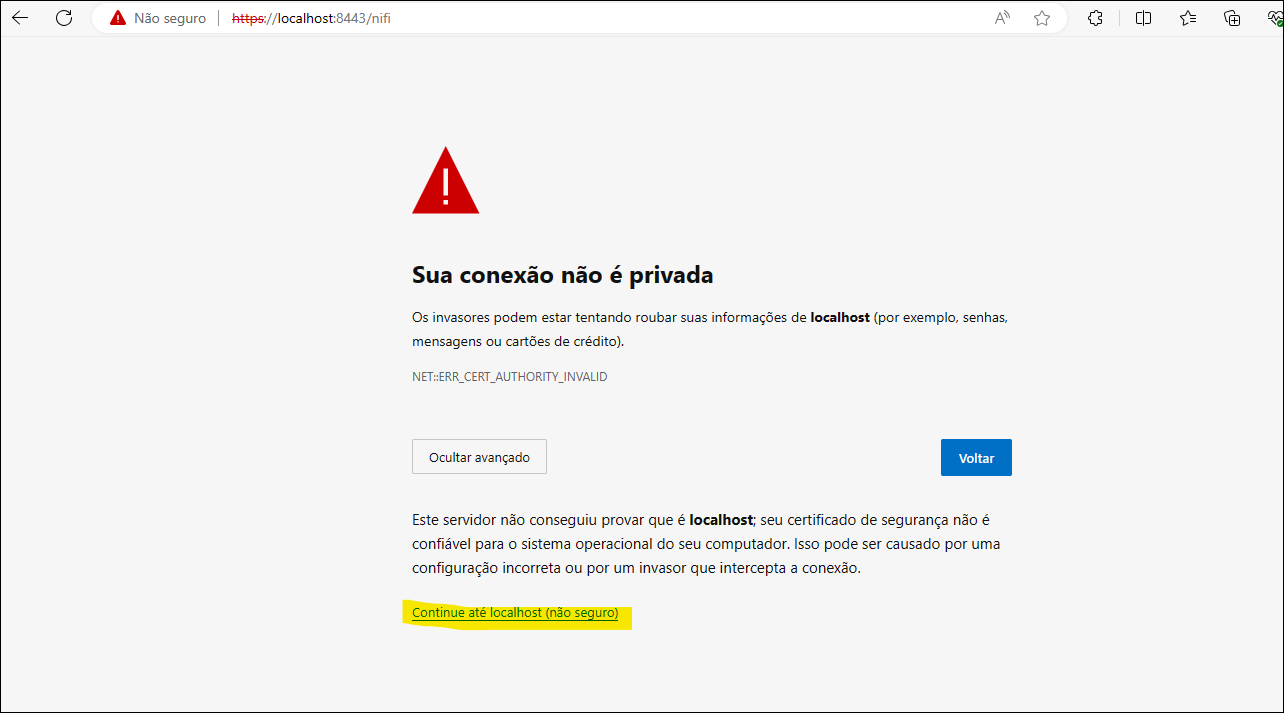

**D**- Acessei o Apache Nifi.

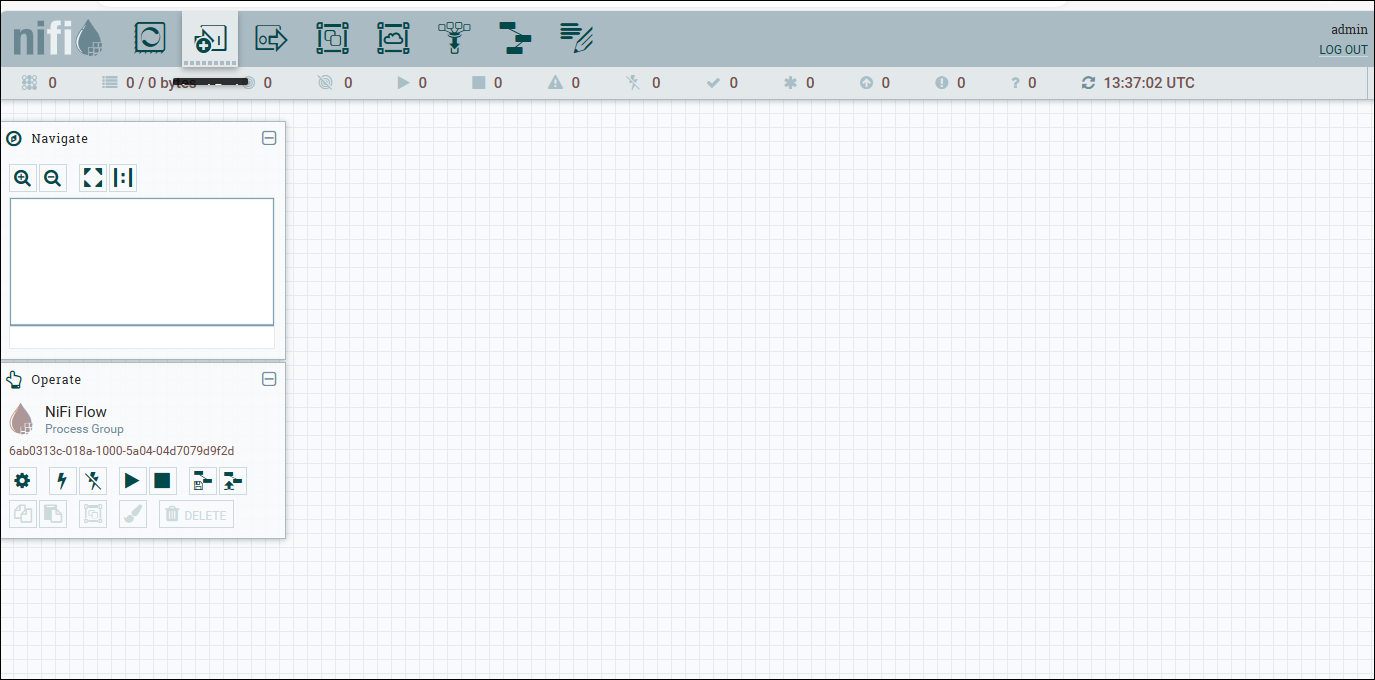


---

###**2- Configurando os Processors no Apache Nifi**
**GetFile**

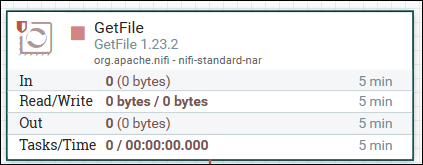

O primeiro processor que configurei para levar um arquivo de dados do servidor do Apache Nifi para uma pasta do HDFS foi o **GetFile.**



**A- Configuração Processor | Getfile | Properties**

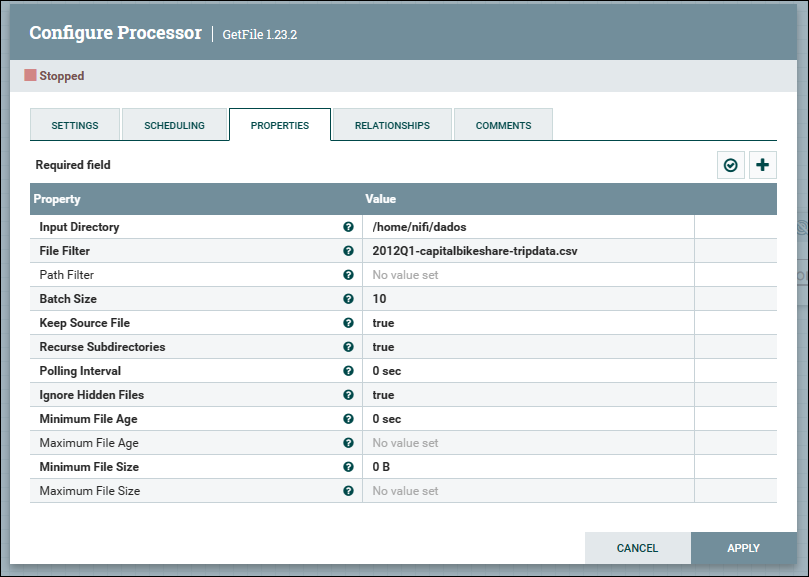


**B- Input Directory**

Em **Properties, Required field, Input Directory**, não coloquei o caminho da pasta como se fosse o da minha máquina local porque tinha um container rodando o Apache Nifi. Portanto, para esse primeiro processor, o caminho do Input Directory precisava ser o endereço de uma pasta dentro do servidor do Apache Nifi, já que estava trabalhando com um container e o Nifi estava dentro dessa máquina.Entrei no container do Nifi no modo bash e criei a pasta nesse caminho:
**/ home/nifi/dados. Dentro da pasta "dados",** realizei o download dos arquivos.


**C- File Filter**\
Em file Filter coloquei o nome dos aqruivo que quero que seja levado.

**D- Keep Source File**\
Marquei como "True" porque eu não quero que o Apache Nifi leia o arquivo na origem e o delete.

As demais configurações que estão em negrito que são obrigatorias eu deixei conforme a configuração Original.



---

###**2.1- Configurando os Processors no Apache Nifi**
**PutHdfs**

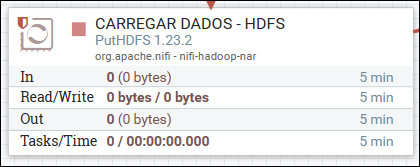

O segundo processor que configurei foi o PutHdfs, ele permite colocar um arquivo em um sistema de arquivos distribuído, como o Hadoop Distributed File System (HDFS).








**A- Configuração Processor | PutHDfs | Properties**

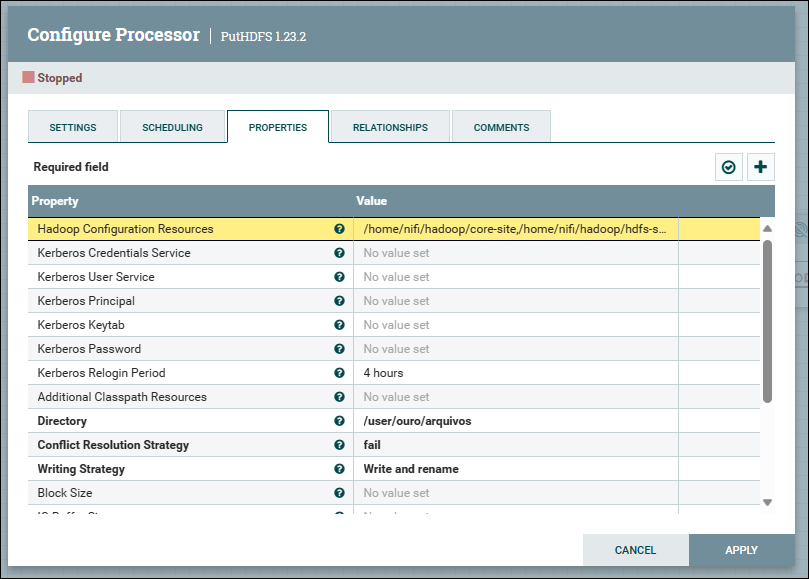

**B- Directory**

Em **Properties, Required field, Directory**\
Coloquei o caminho da pasta que criei dentro meu HDFS.
**/ user/ouro/arquivos**.

**C- Hadoop Configuration Resources**\
Eu configurei o campo "Hadoop Configuration Resources" na propriedade do Apache NiFi, mesmo que ele não esteja em negrito e não seja teoricamente obrigatório. Eu fiz isso porque, apesar de ter configurado o diretório do Hadoop, não disse ao Nifi qual era o servidor do Apache Hadoop, nem o nome do cluster do Hadoop HDFS, nem nenhuma outra informação sobre o servidor que está rodando meu cluster.

O Apache NiFi está rodando em uma máquina e o Apache Hadoop está rodando em outras três máquinas. como o Apache NiFi iria encontrar o Apache Hadoop sem essa configuração? Para que o Nifi pudesse acessar o Hadoop HDFS, eu precisava dizer a ele onde estavam os arquivos de configuração que indicavam o caminho para o cluster, o nome do cluster, as pastas namenodes, ou seja, as informações do cluster.

Se eu deixasse esse campo em branco, o Apache Nifi iria buscar esses arquivos em uma lista chamada classe path, que é uma variável de ambiente com a classe Java. Mas a questão é: o classe path do container Nifi sabe onde está meu cluster? Por isso, a configuração desse item foi necessária.

coloquei os arquivos com as configurações de variaveis e seus caminhos.

**/ home/nifi/hadoop/core-site,/home/nifi/hadoop/hdfs-site**

Cliquei em Apply.

As demais configurações que estão em negrito que são obrigatorias eu deixei conforme a configuração Original.

---

###**2.2- Configurando os Processors no Apache Nifi**
**Criando as ligações entre processors**

Após configurar os processors **GetFile** e **PutHDFS**, fiz a ligação entre os dois. Passei o mouse sobre cada processor e surgiu uma seta, então arrastei e liguei cada processor. Em seguida, cliquei em cada um dos conectores e fiz as configurações necessárias. Para finalizar o fluxo, coloquei uma porta de saída chamada "Fim".

**A-Ligação entre Processors.**

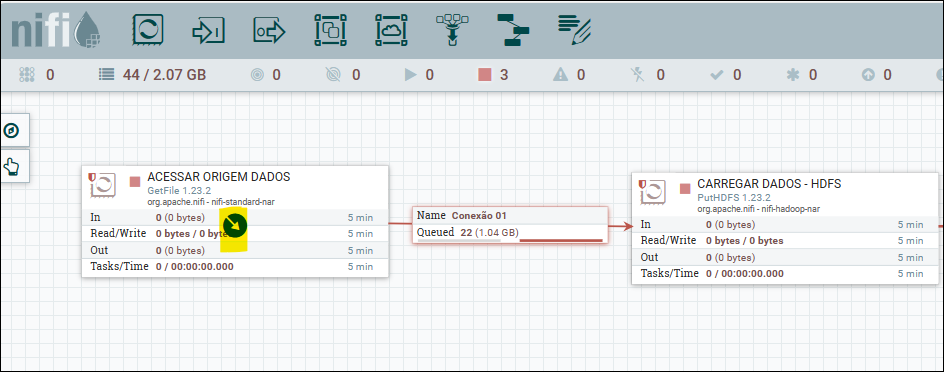


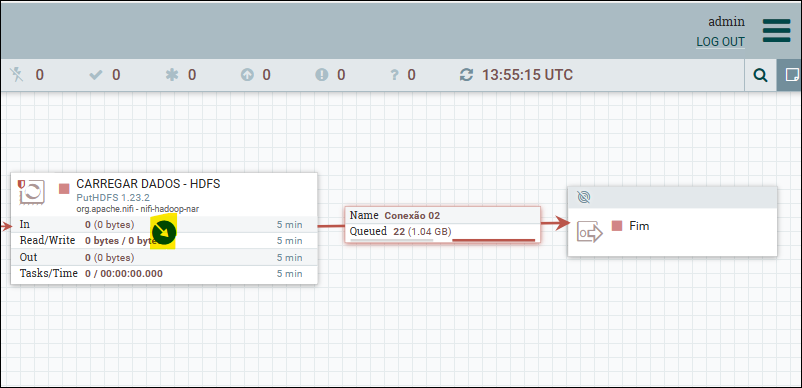

**B- Configuração dos conectores**

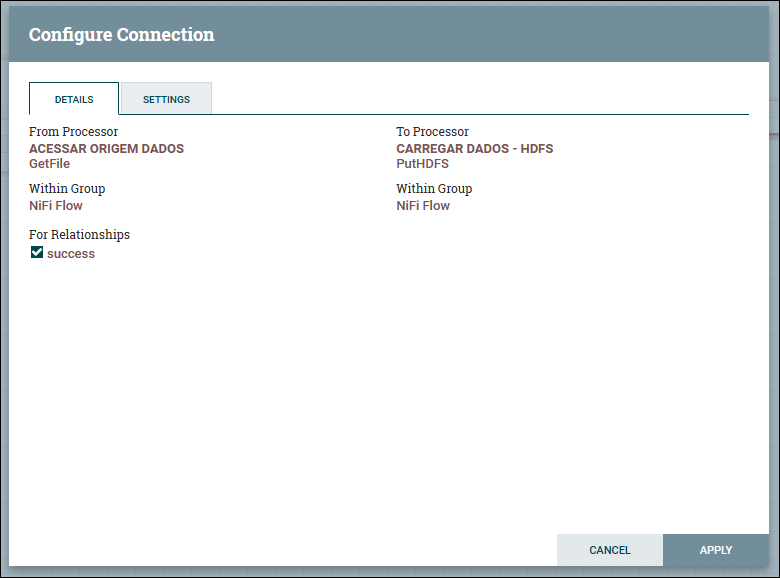


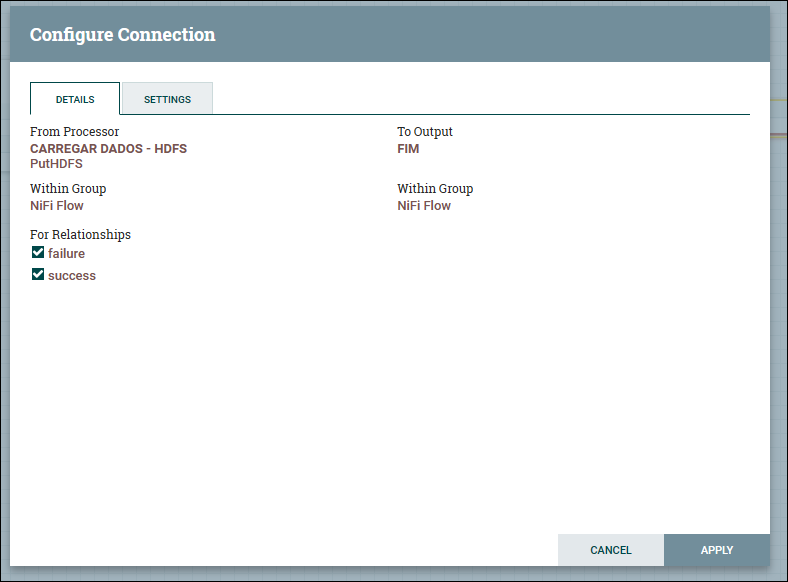

---




###**3- Configurando os Processors no Apache Nifi**
**Verificando o resultado**

Nessa fase final, com os processors criados, configurados e conectados, executei o início do fluxo para mover o arquivo para o hadoop HDFS.

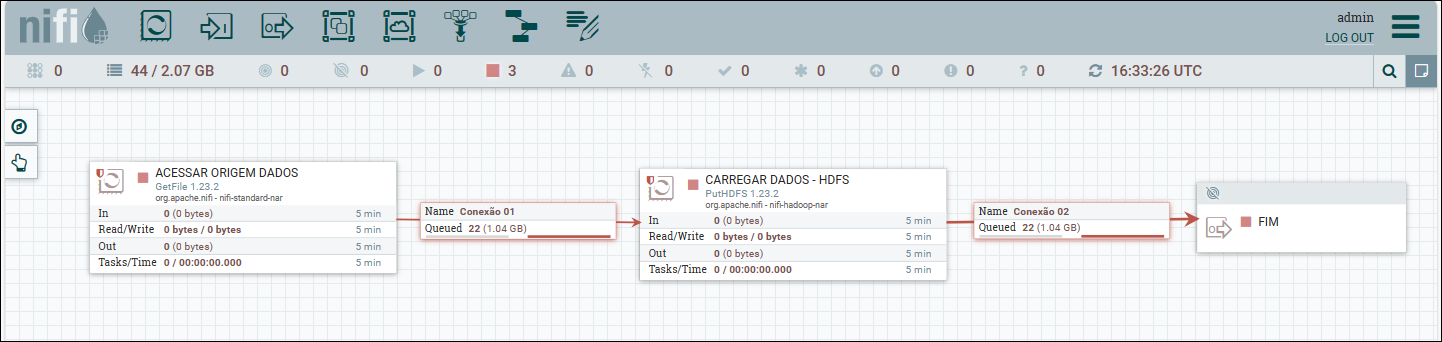


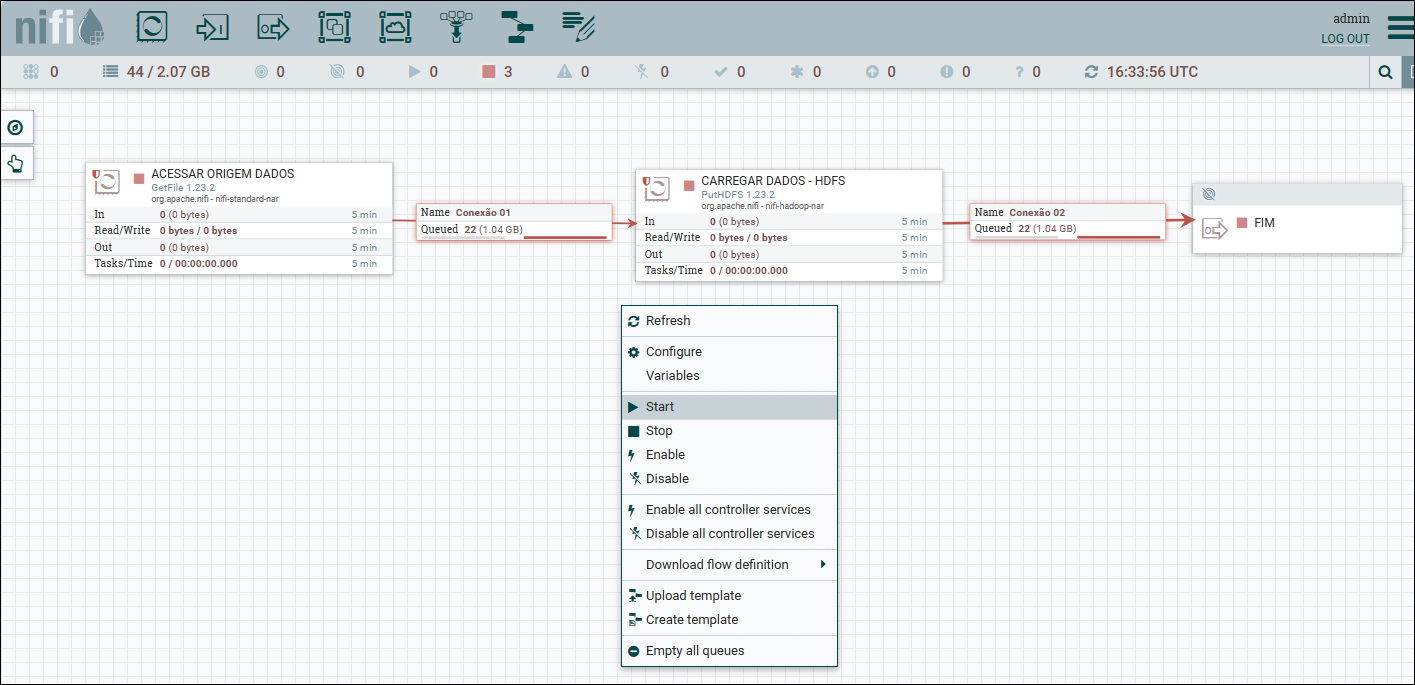



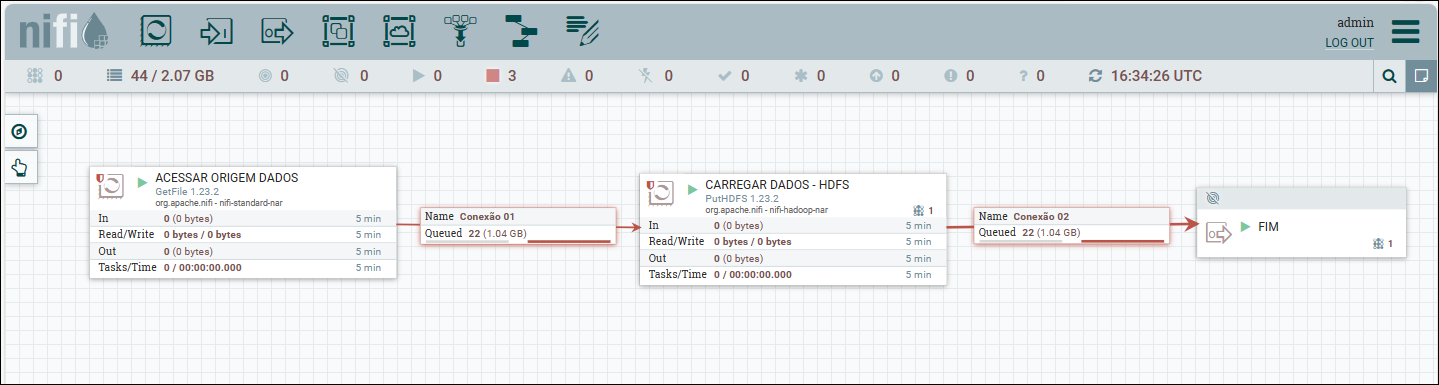


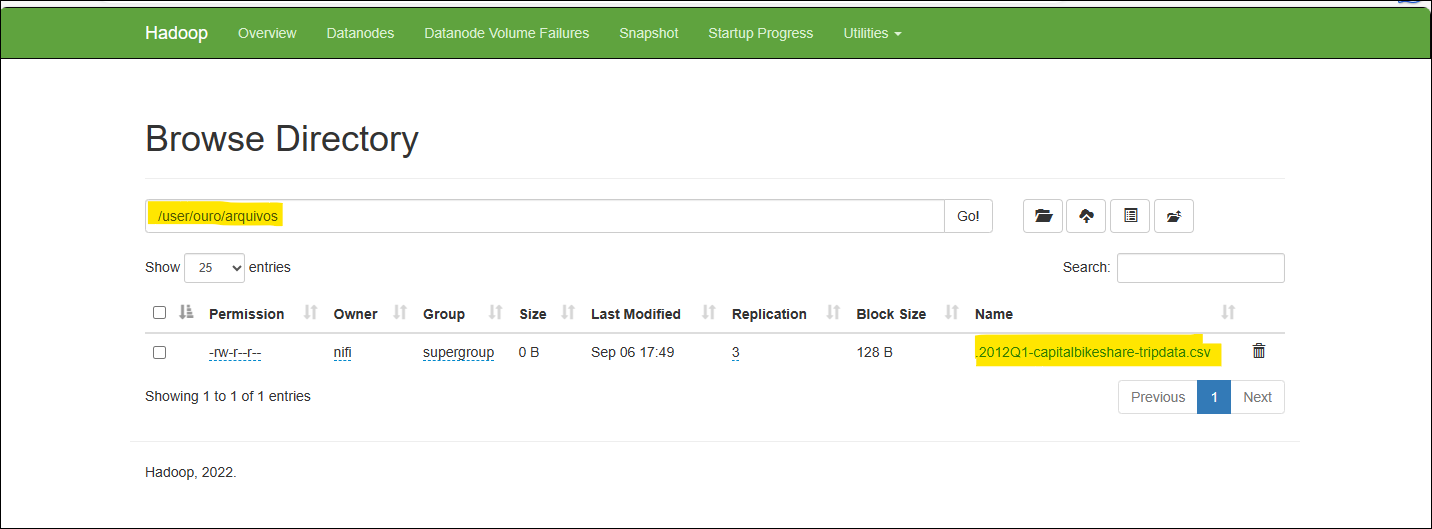

---
###**4- Sprint 03 finalizada!**

O primeiro fluxo, que consiste em mover um arquivo local para uma pasta no Hadoop HDFS que será o **Data Lake**, está concluído e operando com sucesso. Agora, estou avançando para a Sprint 04, na qual vou transferir os dados do **HDFS para um Data Warehouse (PostgreSQL)** e aplicar algumas transformações utilizando os processors do Apache NiFi.